### 051データの読み込み

In [1]:
import pandas as pd
factories = pd.read_csv('sample/06ch/tbl_factory.csv', index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北
FC00006,山形工場,30,東北
FC00007,那須工場,25,東北
FC00008,青森工場,16,東北


In [2]:
warehouses = pd.read_csv('sample/06ch/tbl_warehouse.csv', index_col=0)
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北
WH00006,山形倉庫,65,東北


In [3]:
cost = pd.read_csv('sample/06ch/rel_cost.csv', index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [4]:
trans = pd.read_csv('sample/06ch/tbl_transaction.csv', index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [5]:
# 輸送実績とコストデータの結合
join_data = pd.merge(trans, cost, left_on=['ToFC', 'FromWH'], right_on=['FCID', 'WHID'], how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [6]:
# join_dataに工場データを結合
join_data = pd.merge(join_data, factories, left_on='ToFC', right_on='FCID', how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [7]:
# join_dataに倉庫情報を追加
join_data = pd.merge(join_data, warehouses, left_on='FromWH', right_on='WHID', how='left')
join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [8]:
# 関東支社の抽出
kanto = join_data.loc[join_data['WHRegion']=='関東']
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [9]:
# 東北支社の抽出
tohoku = join_data.loc[join_data['WHRegion']=='東北']
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


### 052輸送量、コストの確認

In [10]:
# 輸送実績の総コスト集計
print('関東支社の総コスト：' + str(kanto['Cost'].sum()) + '万円')
print('東北支社の総コスト：' + str(tohoku['Cost'].sum()) + '万円')

関東支社の総コスト：2189.3万円
東北支社の総コスト：2062.0万円


In [11]:
# 支店別輸送部品個数集計
print('関東支社の総部品総個数：' + str(kanto['Quantity'].sum()) + '個')
print('東北支社の総部品総個数：' + str(tohoku['Quantity'].sum()) + '個')

関東支社の総部品総個数：49146個
東北支社の総部品総個数：50214個


In [12]:
# 部品1つ当たりの輸送コスト
tmp = (kanto['Cost'].sum() / kanto['Quantity'].sum()) * 10000
print('関東支社の部品1つ当りの輸送コスト：' + str(int(tmp)) + '円')
tmp = (tohoku['Cost'].sum() / tohoku['Quantity'].sum()) * 10000
print('東北支社の部品1つ当りの輸送コスト：' + str(int(tmp)) + '円')

関東支社の部品1つ当りの輸送コスト：445円
東北支社の部品1つ当りの輸送コスト：410円


In [13]:
# コストからみる支社別平均輸送コスト
cost_chk = pd.merge(cost, factories, on='FCID', how='left')
print('関東支社の平均輸送コスト：' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='関東'].mean()) + '万円')
print('東北支社の平均輸送コスト：' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='東北'].mean()) + '万円')

関東支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


### 053ネットワークの可視化

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


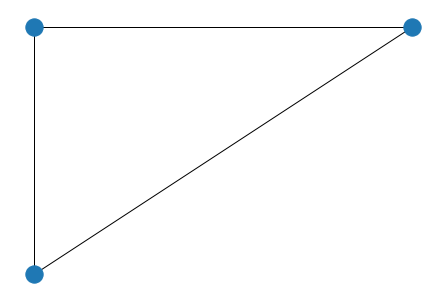

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# グラフィックオブジェクトの作成
G=nx.Graph()

# 頂点の設定
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

# 辺の設定
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')

# 座標の設定
pos={}
pos['nodeA']=(0, 0)
pos['nodeB']=(1, 1)
pos['nodeC']=(0, 1)

# 描画
nx.draw(G, pos)

# 表示
plt.show()

### 054ネットワークにノード（頂点）を追加

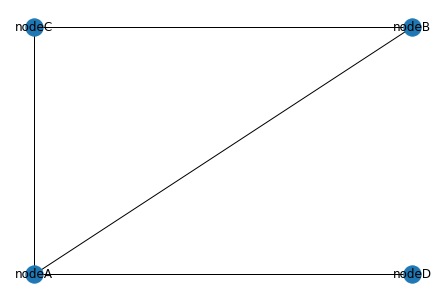

In [15]:
G.add_node('nodeD')

G.add_edge('nodeA', 'nodeD')

pos['nodeD']=(1, 0)

nx.draw(G, pos, with_labels=True)

### 055ルートの重み付け

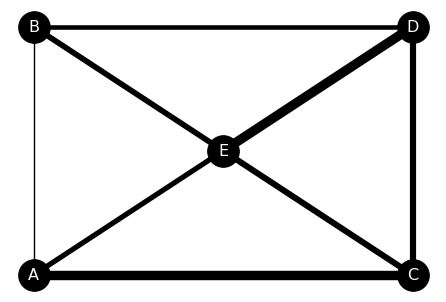

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# データの読み込み
df_w = pd.read_csv('sample/06ch/network_weight.csv')
df_p = pd.read_csv('sample/06ch/network_pos.csv')

# エッジの重みのリスト化
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
        
# グラフィックオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
# 辺の設定
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

# 座標の設定
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])

# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

# 表示
plt.show()

### 056輸送ルート情報の読み込み

In [17]:
import pandas as pd
# データ読み込み
df_tr = pd.read_csv('sample/06ch/trans_route.csv', index_col='工場')
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


### 057輸送ルート情報からネットワーク可視化

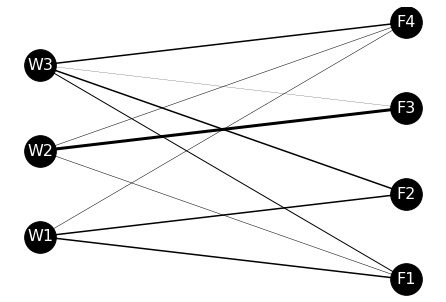

In [18]:
# 自力作成
# Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# データ読む込み
df_tr = pd.read_csv('sample/06ch/trans_route.csv', index_col='工場')

# エッジの重み付け
size = 0.1
edge_weights = []
for i in range(len(df_tr.index)):
    for j in range(len(df_tr.columns)):
        edge_weights.append(df_tr.iloc[i][j]*size)

# グラフィックオブジェクトの作成
G = nx.Graph()

# 頂点の設定
index = 0
for i in range(len(df_tr.index)):
    G.add_node(df_tr.index[i])
for i in range(len(df_tr.columns)):
    G.add_node(df_tr.columns[i])

# 辺の設定
for i in range(len(df_tr.index)):
    for j in range(len(df_tr.columns)):
        G.add_edge(df_tr.index[i], df_tr.columns[j])

# 座標の設定
pos = {}
pos['W1'] = (0, 2)
pos['W2'] = (0, 4)
pos['W3'] = (0, 6)
pos['F1'] = (1, 1)
pos['F2'] = (1, 3)
pos['F3'] = (1, 5)
pos['F4'] = (1, 7)

# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

# 表示
plt.show()

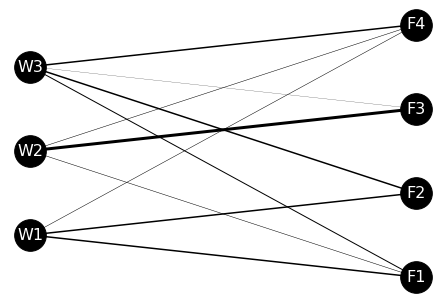

In [2]:
# preparation
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# データ読む込み
df_tr = pd.read_csv('sample/06ch/trans_route.csv', index_col='工場')
df_pos = pd.read_csv('sample/06ch/trans_route_pos.csv')

# グラフィックオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])
    
# 辺の設定＆エッジの重みのリスト化
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # 辺の追加
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            # エッジの重みの追加
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    weight = df_tr[df_pos.columns[i]][df_pos.columns[j]] * size
                elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    weight = df_tr[df_pos.columns[j]][df_pos.columns[i]] * size
                edge_weights.append(weight)

# 座標の設定
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])
    
# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

# 表示
plt.show()

### 058輸送コスト関数

In [4]:
# preparation
import pandas as pd

# データ読み込み
df_tr = pd.read_csv('sample/06ch/trans_route.csv', index_col='工場')
df_tc = pd.read_csv('sample/06ch/trans_cost.csv', index_col='工場')

# 輸送コスト関数
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tc.columns)):
            cost += df_tr.iloc[i][j] * df_tc.iloc[i][j]
    return cost

print('総輸送コスト：'+str(trans_cost(df_tr, df_tc)))

総輸送コスト：1493


### 059制約条件の作成

In [5]:
# preparation
import pandas as pd

# データの読み込み
df_tr = pd.read_csv('sample/06ch/trans_route.csv', index_col='工場')
df_demand = pd.read_csv('sample/06ch/demand.csv')
df_supply = pd.read_csv('sample/06ch/supply.csv')

# 需要側の制約条件
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i]) + 'への輸送量：' + str(temp_sum) + '（需要量：' + str(df_demand.iloc[0][i]) + '）')
    if temp_sum >= df_demand.iloc[0][i]:
        print('需要量を満たしています')
    else:
        print('需要量を満たしていません。輸送ルートを再計算してください。')
        
# 供給側の制約条件
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i]) + 'からの輸送：' + str(temp_sum) + '（供給限界：' + str(df_supply.iloc[0][i]) + '）')
    if temp_sum <= df_supply.iloc[0][i]:
        print('供給限界の範囲です')
    else:
        print('供給限界を超過しています。輸送ルートを再計算してください。')

F1への輸送量：30（需要量：28）
需要量を満たしています
F2への輸送量：30（需要量：29）
需要量を満たしています
F3への輸送量：32（需要量：31）
需要量を満たしています
F4への輸送量：25（需要量：25）
需要量を満たしています
W1からの輸送：35（供給限界：35）
供給限界の範囲です
W2からの輸送：40（供給限界：41）
供給限界の範囲です
W3からの輸送：42（供給限界：42）
供給限界の範囲です


### 060輸送ルートの変更によるコストの変化

In [6]:
# preparation
import pandas as pd
import numpy as np

# データの読み込み
df_tr_new = pd.read_csv('sample/06ch/trans_route_new.csv', index_col='工場')
print(df_tr_new)

# 総輸送コストの再計算
print('総輸送コスト（変更後）：' + str(trans_cost(df_tr_new, df_tc)))

# 制約条件計算関数
# 需要側
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

# 供給側
def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if (temp_sum>=df_supply.iloc[0][i]):
            flag[i] = 1
    return flag

print('需要条件計算結果：'+str(condition_demand(df_tr, df_demand)))
print('供給条件計算結果：'+str(condition_supply(df_tr, df_supply)))

    F1  F2  F3  F4
工場                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
総輸送コスト（変更後）：1428
需要条件計算結果：[1. 1. 1. 1.]
供給条件計算結果：[1. 0. 1.]
